In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, precision_score, recall_score, f1_score

### <font color="blue">Load Dataset</font>

In [47]:
stunting_df = pd.read_csv('Stunting_Dataset.csv')
stunting_df

,Gender,Age,Birth Weight,Birth Length,Body Weight,Body Length,Breastfeeding,Stunting
0,Male,17,3.0,49,10.0,72.2,No,No
1,Female,11,2.9,49,2.9,65.0,No,Yes
2,Male,16,2.9,49,8.5,72.2,No,Yes
3,Male,31,2.8,49,6.4,63.0,No,Yes
4,Male,15,3.1,49,10.5,49.0,No,Yes
...,...,...,...,...,...,...,...,...
9995,Male,15,3.0,49,9.0,63.0,No,Yes
9996,Female,12,2.8,48,7.7,63.0,No,No
9997,Male,16,2.8,49,7.7,49.0,No,No
9998,Male,14,2.8,49,10.0,69.0,No,Yes


In [48]:
stunting_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,10000.0,14.25500,7.923285,6.0,10.0,13.0,15.0,48.0
Birth Weight,10000.0,2.75760,0.291092,2.0,2.8,2.8,2.9,3.1
Birth Length,10000.0,49.11740,0.439814,48.0,49.0,49.0,49.0,50.0
Body Weight,10000.0,7.63199,1.720461,2.9,6.4,7.7,9.0,10.5
Body Length,10000.0,68.85492,8.906640,49.0,65.0,68.3,72.2,92.7


In [49]:
stunting_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Gender         10000 non-null  object 
 1   Age            10000 non-null  int64  
 2   Birth Weight   10000 non-null  float64
 3   Birth Length   10000 non-null  int64  
 4   Body Weight    10000 non-null  float64
 5   Body Length    10000 non-null  float64
 6   Breastfeeding  10000 non-null  object 
 7   Stunting       10000 non-null  object 
dtypes: float64(3), int64(2), object(3)
memory usage: 625.1+ KB


In [50]:
stunting_df.isnull().any()

Gender           False
Age              False
Birth Weight     False
Birth Length     False
Body Weight      False
Body Length      False
Breastfeeding    False
Stunting         False
dtype: bool

In [51]:
from sklearn.preprocessing import LabelEncoder

In [52]:
label_encoder = LabelEncoder()

# Applying label encoding to the 'Gender', 'Breastfeeding', and 'Stunting' columns
stunting_df['Gender'] = label_encoder.fit_transform(stunting_df['Gender'])
stunting_df['Breastfeeding'] = label_encoder.fit_transform(stunting_df['Breastfeeding'])
stunting_df['Stunting'] = label_encoder.fit_transform(stunting_df['Stunting'])

stunting_df

,Gender,Age,Birth Weight,Birth Length,Body Weight,Body Length,Breastfeeding,Stunting
0,1,17,3.0,49,10.0,72.2,0,0
1,0,11,2.9,49,2.9,65.0,0,1
2,1,16,2.9,49,8.5,72.2,0,1
3,1,31,2.8,49,6.4,63.0,0,1
4,1,15,3.1,49,10.5,49.0,0,1
...,...,...,...,...,...,...,...,...
9995,1,15,3.0,49,9.0,63.0,0,1
9996,0,12,2.8,48,7.7,63.0,0,0
9997,1,16,2.8,49,7.7,49.0,0,0
9998,1,14,2.8,49,10.0,69.0,0,1


male: 1, female: 0, yes: 1, no: 0

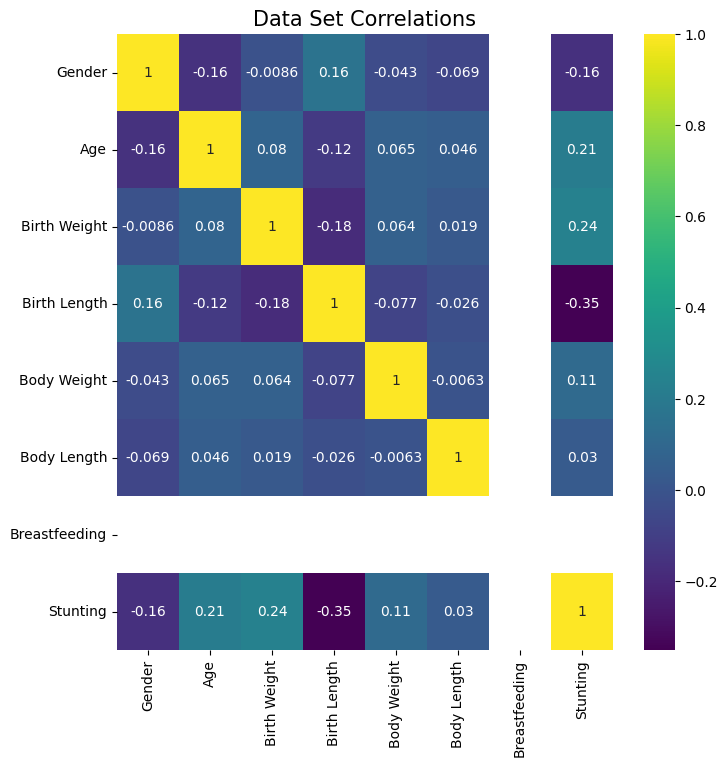

In [53]:
plt.figure(figsize=(8,8))
corr_plot = sns.heatmap(stunting_df.corr(), cmap="viridis", annot=True)
plt.title('Data Set Correlations', size=15)
plt.show()

In [54]:
breastfeeding_counts = stunting_df['Breastfeeding'].value_counts()
breastfeeding_counts

Breastfeeding
0    10000
Name: count, dtype: int64

In [55]:
stunting_df_2 = pd.read_excel('Stunting_Dataset_2.xlsx')
stunting_df_2

,Sex,Age,Birth Weight,Birth Length,Body Weight,Body Length,ASI Eksklusif,Stunting
0,F,56,2.9,50,11.0,90.0,Yes,No
1,F,20,3.3,49,11.1,80.5,No,No
2,M,4,2.8,48,6.5,63.0,No,No
3,F,14,2.0,49,7.0,71.0,Yes,No
4,M,32,3.2,49,11.0,88.7,Yes,No
...,...,...,...,...,...,...,...,...
6495,M,53,2.9,49,15.0,96.0,No,Yes
6496,M,9,2.9,50,7.3,62.0,No,Yes
6497,F,20,1.8,48,7.3,73.0,Yes,Yes
6498,M,11,2.9,49,7.7,66.0,No,Yes


In [56]:
stunting_df_2['Sex'] = label_encoder.fit_transform(stunting_df_2['Sex'])
stunting_df_2['ASI Eksklusif'] = label_encoder.fit_transform(stunting_df_2['ASI Eksklusif'])
stunting_df_2['Stunting'] = label_encoder.fit_transform(stunting_df_2['Stunting'])

stunting_df_2

,Sex,Age,Birth Weight,Birth Length,Body Weight,Body Length,ASI Eksklusif,Stunting
0,0,56,2.9,50,11.0,90.0,1,0
1,0,20,3.3,49,11.1,80.5,0,0
2,1,4,2.8,48,6.5,63.0,0,0
3,0,14,2.0,49,7.0,71.0,1,0
4,1,32,3.2,49,11.0,88.7,1,0
...,...,...,...,...,...,...,...,...
6495,1,53,2.9,49,15.0,96.0,0,1
6496,1,9,2.9,50,7.3,62.0,0,1
6497,0,20,1.8,48,7.3,73.0,1,1
6498,1,11,2.9,49,7.7,66.0,0,1


In [57]:
column_mapping = {'Sex': 'Gender',
                  'ASI Eksklusif': 'Breastfeeding'}

stunting_df_2.rename(columns=column_mapping, inplace=True)
stunting_df_2

,Gender,Age,Birth Weight,Birth Length,Body Weight,Body Length,Breastfeeding,Stunting
0,0,56,2.9,50,11.0,90.0,1,0
1,0,20,3.3,49,11.1,80.5,0,0
2,1,4,2.8,48,6.5,63.0,0,0
3,0,14,2.0,49,7.0,71.0,1,0
4,1,32,3.2,49,11.0,88.7,1,0
...,...,...,...,...,...,...,...,...
6495,1,53,2.9,49,15.0,96.0,0,1
6496,1,9,2.9,50,7.3,62.0,0,1
6497,0,20,1.8,48,7.3,73.0,1,1
6498,1,11,2.9,49,7.7,66.0,0,1


In [58]:
stunting_df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6500 entries, 0 to 6499
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Gender         6500 non-null   int32  
 1   Age            6500 non-null   int64  
 2   Birth Weight   6500 non-null   float64
 3   Birth Length   6500 non-null   int64  
 4   Body Weight    6500 non-null   float64
 5   Body Length    6500 non-null   float64
 6   Breastfeeding  6500 non-null   int32  
 7   Stunting       6500 non-null   int32  
dtypes: float64(3), int32(3), int64(2)
memory usage: 330.2 KB


In [59]:
stunting_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Gender         10000 non-null  int32  
 1   Age            10000 non-null  int64  
 2   Birth Weight   10000 non-null  float64
 3   Birth Length   10000 non-null  int64  
 4   Body Weight    10000 non-null  float64
 5   Body Length    10000 non-null  float64
 6   Breastfeeding  10000 non-null  int32  
 7   Stunting       10000 non-null  int32  
dtypes: float64(3), int32(3), int64(2)
memory usage: 507.9 KB


In [60]:
combined_df = pd.concat([stunting_df, stunting_df_2], ignore_index=True)
combined_df

,Gender,Age,Birth Weight,Birth Length,Body Weight,Body Length,Breastfeeding,Stunting
0,1,17,3.0,49,10.0,72.2,0,0
1,0,11,2.9,49,2.9,65.0,0,1
2,1,16,2.9,49,8.5,72.2,0,1
3,1,31,2.8,49,6.4,63.0,0,1
4,1,15,3.1,49,10.5,49.0,0,1
...,...,...,...,...,...,...,...,...
16495,1,53,2.9,49,15.0,96.0,0,1
16496,1,9,2.9,50,7.3,62.0,0,1
16497,0,20,1.8,48,7.3,73.0,1,1
16498,1,11,2.9,49,7.7,66.0,0,1


In [61]:
corr = combined_df.corr()
corr[abs(corr['Stunting']) < 0.1]['Stunting']

Gender   -0.064596
Age      -0.079274
Name: Stunting, dtype: float64

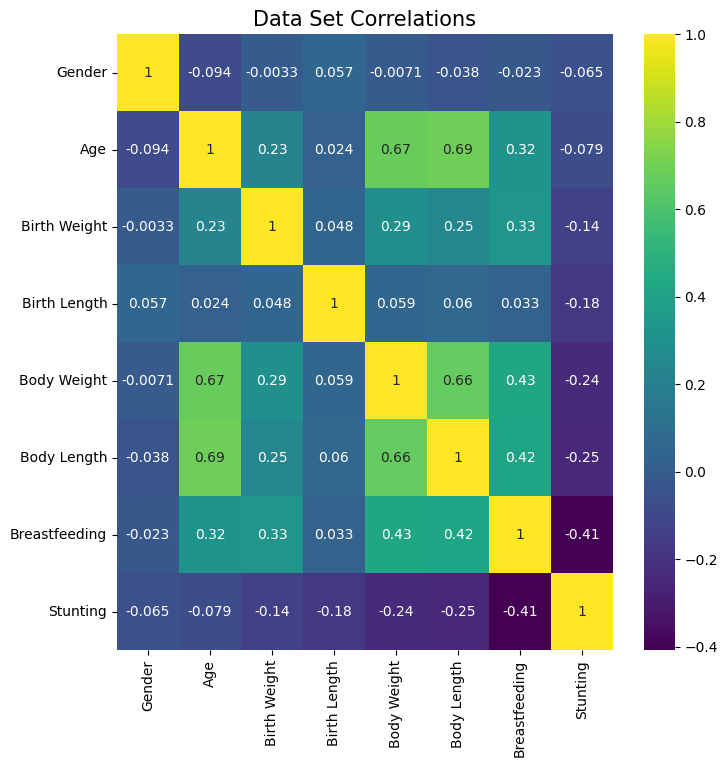

In [62]:
plt.figure(figsize=(8,8))
corr_plot = sns.heatmap(combined_df.corr(), cmap="viridis", annot=True)
plt.title('Data Set Correlations', size=15)
plt.show()

### <font color="blue">Decision Tree</font>

In [63]:
from sklearn.feature_selection import SelectKBest, f_regression

In [64]:
X_try = combined_df.drop("Stunting", axis = 1)
y = combined_df["Stunting"]

In [65]:
selector = SelectKBest(score_func=f_regression, k=5)
X_new = selector.fit_transform(X_try, y)

selected_feature_indices = selector.get_support(indices=True)
selected_feature = X_try.columns[selected_feature_indices]
print("Fitur terbaik:", selected_feature)

Fitur terbaik: Index(['Birth Weight', 'Birth Length', 'Body Weight', 'Body Length',
       'Breastfeeding'],
      dtype='object')


In [66]:
combined_df['Stunting'].value_counts()

Stunting
1    11267
0     5233
Name: count, dtype: int64

In [67]:
final_df = combined_df.drop(['Age', 'Gender'], axis=1)
final_df

,Birth Weight,Birth Length,Body Weight,Body Length,Breastfeeding,Stunting
0,3.0,49,10.0,72.2,0,0
1,2.9,49,2.9,65.0,0,1
2,2.9,49,8.5,72.2,0,1
3,2.8,49,6.4,63.0,0,1
4,3.1,49,10.5,49.0,0,1
...,...,...,...,...,...,...
16495,2.9,49,15.0,96.0,0,1
16496,2.9,50,7.3,62.0,0,1
16497,1.8,48,7.3,73.0,1,1
16498,2.9,49,7.7,66.0,0,1


In [68]:
features = ['Birth Weight', 'Birth Length', 'Body Weight', 'Body Length', 'Breastfeeding']
X = final_df[features]
X

,Birth Weight,Birth Length,Body Weight,Body Length,Breastfeeding
0,3.0,49,10.0,72.2,0
1,2.9,49,2.9,65.0,0
2,2.9,49,8.5,72.2,0
3,2.8,49,6.4,63.0,0
4,3.1,49,10.5,49.0,0
...,...,...,...,...,...
16495,2.9,49,15.0,96.0,0
16496,2.9,50,7.3,62.0,0
16497,1.8,48,7.3,73.0,1
16498,2.9,49,7.7,66.0,0


In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'X_train shape: {X_train.shape} y_train.shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape} y_test.shape: {y_test.shape}')

X_train shape: (13200, 5) y_train.shape: (13200,)
X_test shape: (3300, 5) y_test.shape: (3300,)


In [70]:
# Inisialisasi variabel untuk menyimpan hasil terbaik
best_depth = 0
best_accuracy = 0

for i in range(1, 30):
    model_dec_tree = DecisionTreeClassifier(criterion='entropy', max_depth=i)

    # Melatih model pada data pelatihan
    model_dec_tree.fit(X_train, y_train)

    # Melakukan prediksi pada data pengujian
    y_test_pred = model_dec_tree.predict(X_test)

    # Menghitung akurasi prediksi
    accuracy = accuracy_score(y_test, y_test_pred)
    
    print(f"Depth: {i}, Accuracy: {accuracy}")

    # Memeriksa apakah akurasi saat ini lebih baik daripada yang sebelumnya
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_depth = i

print(f"Kedalaman Maksimum Terbaik: {best_depth}")
print(f"Akurasi Terbaik: {best_accuracy}")

Depth: 1, Accuracy: 0.7648484848484849
Depth: 2, Accuracy: 0.7748484848484849
Depth: 3, Accuracy: 0.8048484848484848
Depth: 4, Accuracy: 0.833939393939394
Depth: 5, Accuracy: 0.8378787878787879
Depth: 6, Accuracy: 0.8403030303030303
Depth: 7, Accuracy: 0.8478787878787879
Depth: 8, Accuracy: 0.8618181818181818
Depth: 9, Accuracy: 0.8709090909090909
Depth: 10, Accuracy: 0.8936363636363637
Depth: 11, Accuracy: 0.8945454545454545
Depth: 12, Accuracy: 0.8912121212121212
Depth: 13, Accuracy: 0.8939393939393939
Depth: 14, Accuracy: 0.8930303030303031
Depth: 15, Accuracy: 0.8893939393939394
Depth: 16, Accuracy: 0.8896969696969697
Depth: 17, Accuracy: 0.889090909090909
Depth: 18, Accuracy: 0.89
Depth: 19, Accuracy: 0.8893939393939394
Depth: 20, Accuracy: 0.8939393939393939
Depth: 21, Accuracy: 0.8927272727272727
Depth: 22, Accuracy: 0.8918181818181818
Depth: 23, Accuracy: 0.8896969696969697
Depth: 24, Accuracy: 0.8915151515151515
Depth: 25, Accuracy: 0.8893939393939394
Depth: 26, Accuracy: 0.88

In [71]:
from sklearn import tree as sk_tree
from sklearn.tree import export_graphviz

In [72]:
best_dt = DecisionTreeClassifier(criterion='entropy', max_depth = 11)
best_dt.fit(X_train, y_train)
y_pred = best_dt.predict(X_test)
y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [73]:
y_test

3207     1
5890     1
8813     1
12295    1
12355    0
        ..
704      1
2417     1
2655     1
8692     1
7442     1
Name: Stunting, Length: 3300, dtype: int32

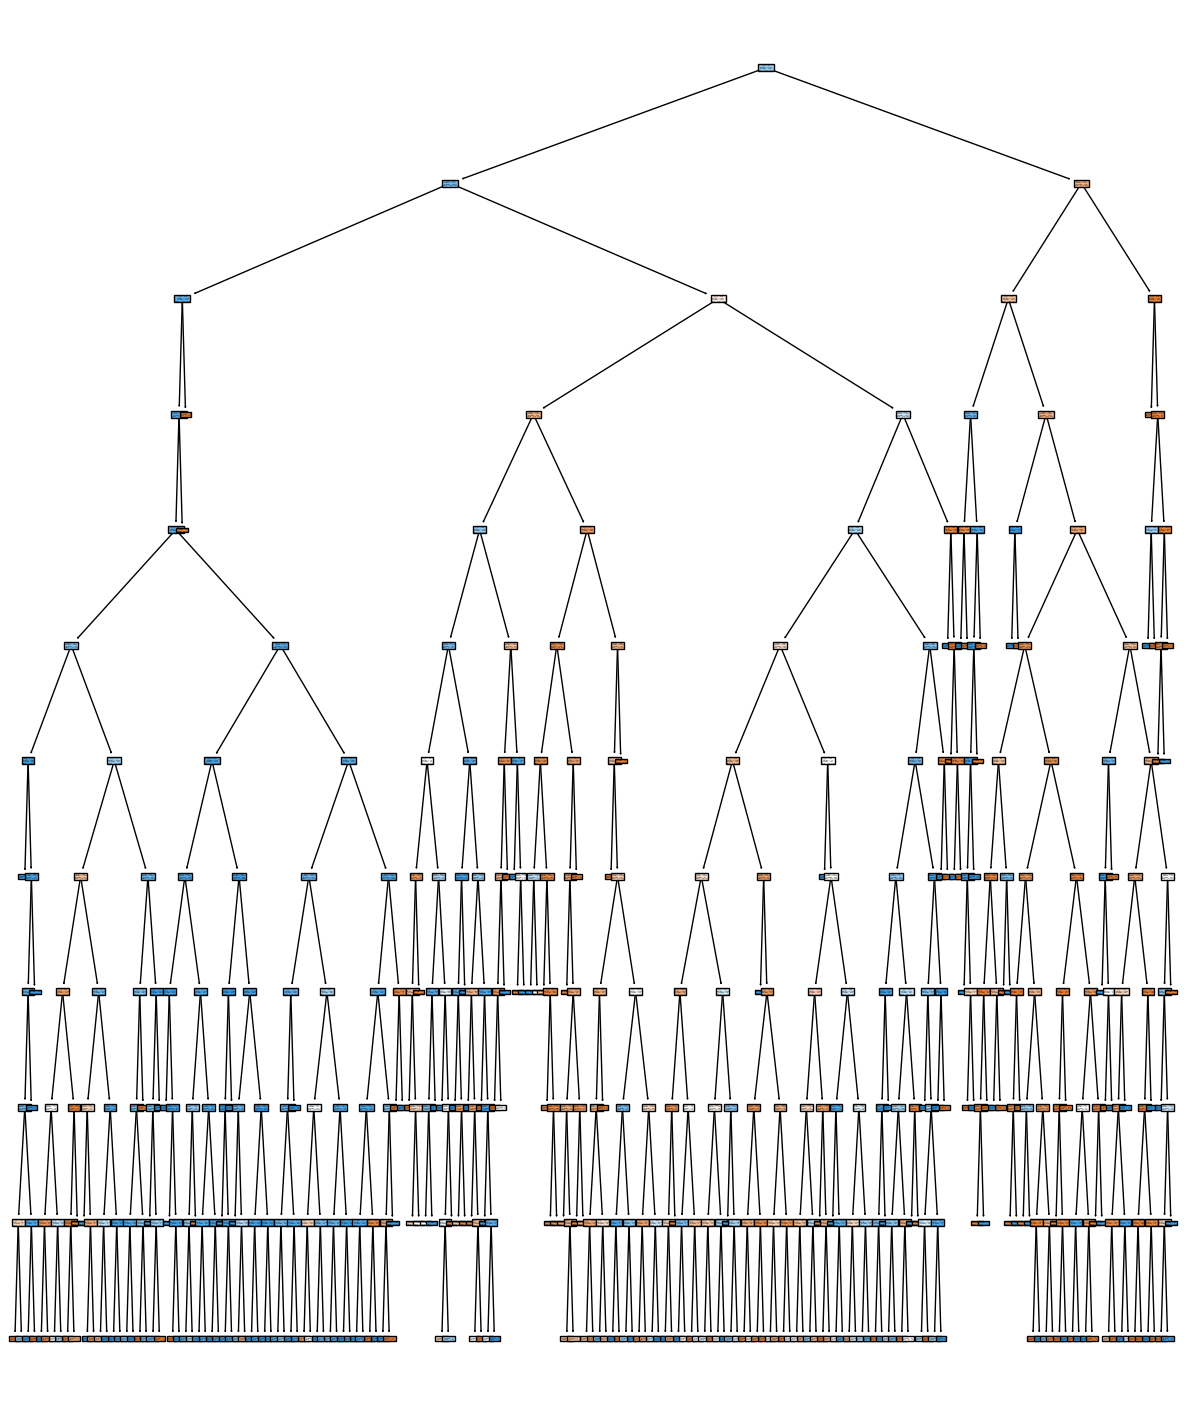

In [74]:
plt.figure(figsize=(15, 18))
plot_tree(best_dt, filled=True)
plt.show()

In [75]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.74      0.82      1042
           1       0.89      0.97      0.93      2258

    accuracy                           0.89      3300
   macro avg       0.90      0.85      0.87      3300
weighted avg       0.90      0.89      0.89      3300



In [76]:
def plot_confusion_matrix(y_true, y_pred, classes='auto', figsize=(10, 10), text_size=12):

    cm = confusion_matrix(y_true, y_pred)

    plt.figure(figsize=figsize)

    disp = sns.heatmap(
        cm, annot=True, cmap='Greens',
        annot_kws={"size": text_size}, fmt='g',
        linewidths=1, linecolor='black', clip_on=False,
        xticklabels=classes, yticklabels=classes)

    disp.set_title('Confusion Matrix', fontsize=24)
    disp.set_xlabel('Predicted Label', fontsize=20)
    disp.set_ylabel('True Label', fontsize=20)
    plt.yticks(rotation=0)

    plt.show()

    return

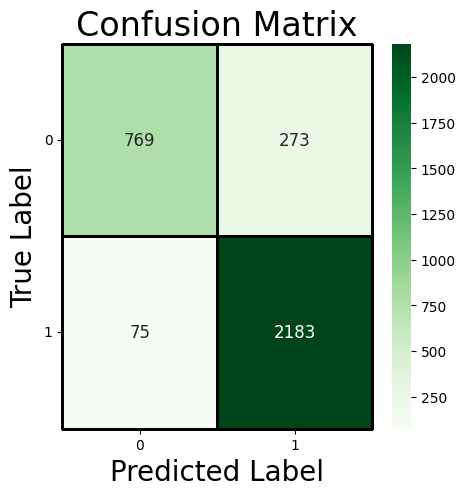

In [77]:
class_names = ['0', '1']

plot_confusion_matrix(
    y_test, y_pred,
    figsize=(5, 5),
    classes=class_names)

In [78]:
#Feature names
feature_names = ['Birth Weight', 'Birth Length', 'Body Weight', 'Body Length', 'Breastfeeding']

model = best_dt
# Function to get user input and make predictions
def predict_stunting(model, features):
    # Get user input for each feature
    user_input = {}
    for feature in features:
        value = float(input(f"Enter {feature}: "))
        user_input[feature] = [value]
        #print(type(value))

    # Create a DataFrame from user input
    user_df = pd.DataFrame(user_input)

    # Use the model to make predictions
    prediction = model.predict(user_df)

    return prediction

# Get predictions for user input
user_prediction = predict_stunting(best_dt, feature_names)

# Display the prediction
print(f"The predicted outcome is: {user_prediction}")

Enter Birth Weight: 3
Enter Birth Length: 50
Enter Body Weight: 50
Enter Body Length: 170
Enter Breastfeeding: 1
The predicted outcome is: [0]


### <font color="blue">Random Forest</font>

In [79]:
from sklearn.ensemble import RandomForestClassifier

In [80]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [83]:
# Inisialisasi variabel untuk menyimpan hasil terbaik
best_n_rf = 0
best_accuracy_rf = 0

for i in range(1, 6):
    model_rf = RandomForestClassifier(n_estimators=i*100)

    # Melatih model pada data pelatihan
    model_rf.fit(X_train, y_train)

    # Melakukan prediksi pada data pengujian
    y_test_pred = model_rf.predict(X_test)

    # Menghitung akurasi prediksi
    accuracy = accuracy_score(y_test, y_test_pred)
    
    print(f"N estimator: {i*100}, Accuracy: {accuracy}")

    # Memeriksa apakah akurasi saat ini lebih baik daripada yang sebelumnya
    if accuracy > best_accuracy_rf:
        best_accuracy_rf = accuracy
        best_n_rf = i

print(f"N estimator terbaik: {best_n_rf}")
print(f"Akurasi terbaik: {best_accuracy_rf}")

N estimator: 100, Accuracy: 0.8993939393939394
N estimator: 200, Accuracy: 0.8987878787878788
N estimator: 300, Accuracy: 0.9012121212121212
N estimator: 400, Accuracy: 0.9015151515151515
N estimator: 500, Accuracy: 0.9003030303030303
N estimator terbaik: 4
Akurasi terbaik: 0.9015151515151515


In [84]:
# Inisialisasi variabel untuk menyimpan hasil terbaik
best_sl_rf = 0
best_accuracy_rf = 0

for i in range(1, 11):
    model_rf = RandomForestClassifier(n_estimators=400, min_samples_leaf=i*5)

    # Melatih model pada data pelatihan
    model_rf.fit(X_train, y_train)

    # Melakukan prediksi pada data pengujian
    y_test_pred = model_rf.predict(X_test)

    # Menghitung akurasi prediksi
    accuracy = accuracy_score(y_test, y_test_pred)
    
    print(f"Sample leaf: {i*5}, Accuracy: {accuracy}")

    # Memeriksa apakah akurasi saat ini lebih baik daripada yang sebelumnya
    if accuracy > best_accuracy_rf:
        best_accuracy_rf = accuracy
        best_sl_rf = i

print(f"Min sample leaf terbaik: {best_sl_rf}")
print(f"Akurasi terbaik: {best_accuracy_rf}")

Sample leaf: 5, Accuracy: 0.9072727272727272
Sample leaf: 10, Accuracy: 0.9066666666666666
Sample leaf: 15, Accuracy: 0.8987878787878788
Sample leaf: 20, Accuracy: 0.8921212121212121
Sample leaf: 25, Accuracy: 0.8893939393939394
Sample leaf: 30, Accuracy: 0.8860606060606061
Sample leaf: 35, Accuracy: 0.8842424242424243
Sample leaf: 40, Accuracy: 0.8784848484848485
Sample leaf: 45, Accuracy: 0.8766666666666667
Sample leaf: 50, Accuracy: 0.87
Min sample leaf terbaik: 1
Akurasi terbaik: 0.9072727272727272


In [85]:
best_rf = RandomForestClassifier(n_estimators=400,
                                    min_samples_leaf=1,
                                    random_state=0)

best_rf.fit(X_train, y_train)

print_score(best_rf, X_train, y_train, X_test, y_test, train=True)
print_score(best_rf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 93.09%
_______________________________________________
CLASSIFICATION REPORT:
                     0            1  accuracy     macro avg  weighted avg
precision     0.937083     0.928458  0.930909      0.932771      0.931197
recall        0.838702     0.973804  0.930909      0.906253      0.930909
f1-score      0.885167     0.950591  0.930909      0.917879      0.929819
support    4191.000000  9009.000000  0.930909  13200.000000  13200.000000
_______________________________________________
Confusion Matrix: 
 [[3515  676]
 [ 236 8773]]

Test Result:
Accuracy Score: 89.94%
_______________________________________________
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.873684     0.909787  0.899394     0.891736      0.898387
recall        0.796545     0.946856  0.899394     0.871700      0.899394
f1-score      0.833333     0.927951  0.899394     0.880642      0.898075
support    1042.000000  225

In [86]:
y_pred = best_rf.predict(X_test)
y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [87]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.80      0.83      1042
           1       0.91      0.95      0.93      2258

    accuracy                           0.90      3300
   macro avg       0.89      0.87      0.88      3300
weighted avg       0.90      0.90      0.90      3300



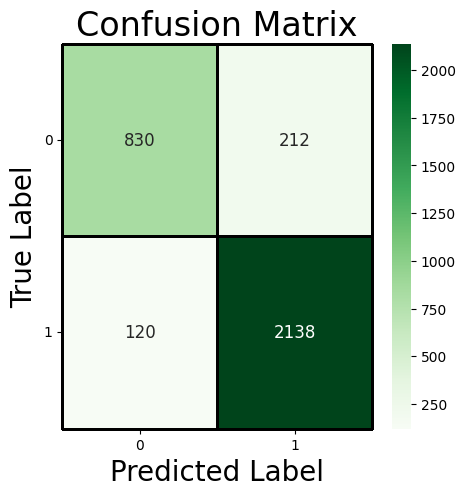

In [88]:
class_names = ['0', '1']

plot_confusion_matrix(
    y_test, y_pred,
    figsize=(5, 5),
    classes=class_names)

Sedikit lebih baik Random Forest Classifier